In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from category_encoders import OneHotEncoder, TargetEncoder, OrdinalEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report


from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import missingno as msno

In [3]:
aus = pd.read_csv('/Users/wooseokpark/Documents/codestates/rain-in-aus/weatherAUS.csv')
aus

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
# non-numeric types
'''
WindGustDir : 
The direction of the strongest wind gust 
in the 24 hours to midnight
'''

aus.select_dtypes(exclude=np.number)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


/var/folders/x2/cknq9hv17x34r_v1qbmvpgdh0000gn/T/ipykernel_27785/1849155179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb['RainToday'] = aus['RainToday']
/var/folders/x2/cknq9hv17x34r_v1qbmvpgdh0000gn/T/ipykernel_27785/1849155179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb['RainTomorrow'] = aus['RainTomorrow']


<AxesSubplot:>

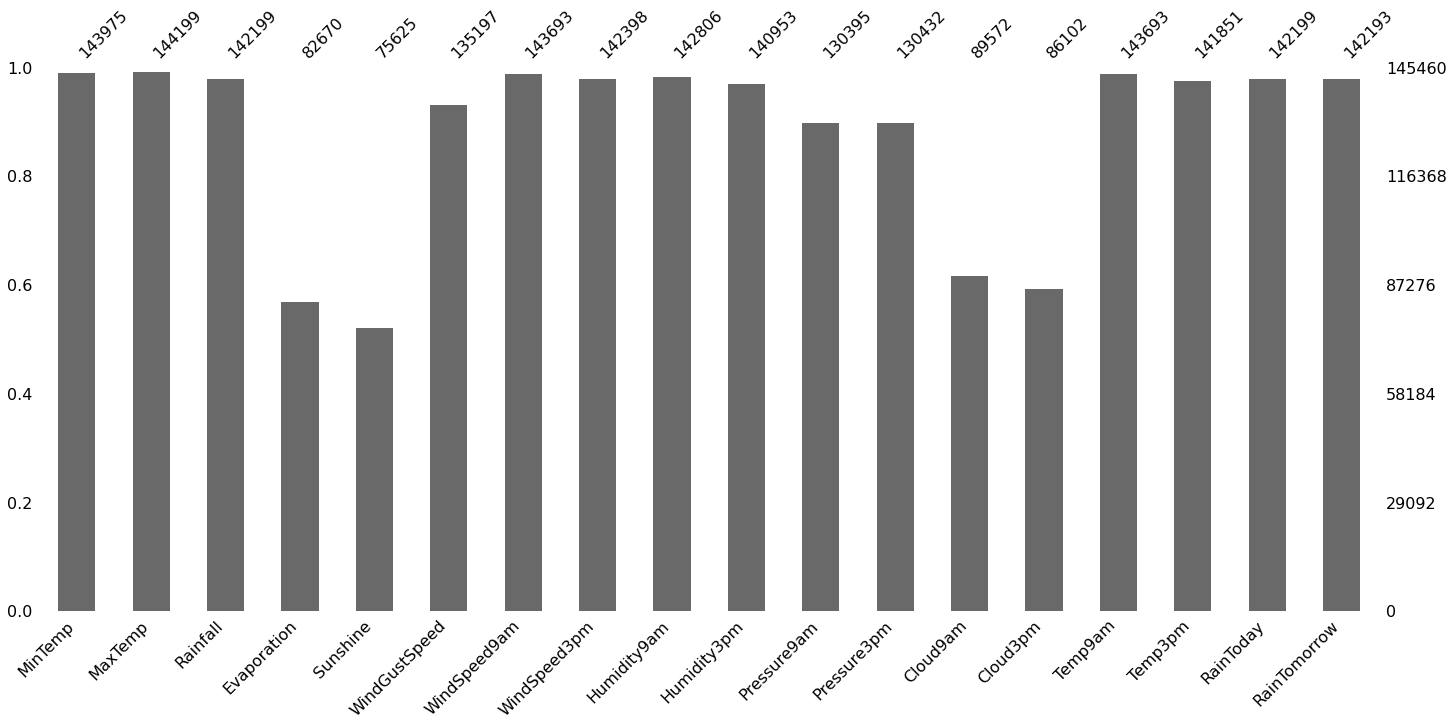

In [8]:
# numeric 결측치 확인 
anb = aus.select_dtypes(np.number)

# 가장 중요할 두 지표 붙이기
anb['RainToday'] = aus['RainToday']
anb['RainTomorrow'] = aus['RainTomorrow']
msno.bar(anb)

In [12]:
# Evaporation, Sunshine, Cloud 등 nan 값 원인 파악하기

# numeric 결측치 확인 
anb = aus.select_dtypes(np.number)

# 가장 중요할 두 지표 붙이기
anb['RainToday'] = aus['RainToday']
anb['RainTomorrow'] = aus['RainTomorrow']

# evaporation, sunshine, cloud는 너무 결측치가 많고 유추하기도 힘들다. 따라서 그냥 제거한다
anb = anb.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

# no, yes -> 0, 1 로 바꾸기
def yesno(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
anb['RainToday'] = anb['RainToday'].apply(yesno)
anb['RainTomorrow'] = anb['RainTomorrow'].apply(yesno)

# 결측치 있는 row 제거
# anb = anb.dropna()

anb


/var/folders/x2/cknq9hv17x34r_v1qbmvpgdh0000gn/T/ipykernel_27785/3275323413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb['RainToday'] = aus['RainToday']
/var/folders/x2/cknq9hv17x34r_v1qbmvpgdh0000gn/T/ipykernel_27785/3275323413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anb['RainTomorrow'] = aus['RainTomorrow']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0
145458,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0


In [11]:
anb['Sunshine'].value_counts()

0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64